# Exploring ensemble classifiers

## Getting ready

Prepare the Pipeline

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from evaluation_report import performance_evaluation_report

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


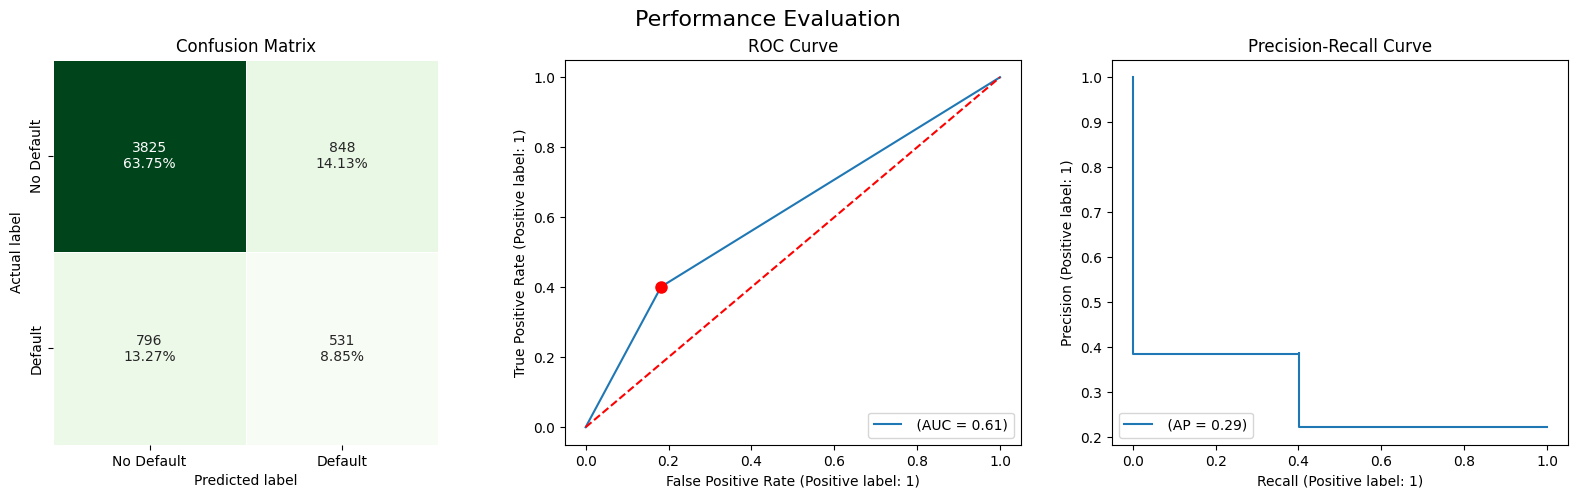

In [3]:
df = pd.read_csv('./datasets/credit_card_default.csv', na_values="")

X = df.copy()
y = X.pop('default_payment_next_month')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_features = X_train.select_dtypes(include="number").columns.tolist()
cat_features = X_train.select_dtypes(include="object").columns.tolist()

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(categories=cat_list, sparse=False,
                             handle_unknown="error", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", num_pipeline, num_features),
        ("categorical", cat_pipeline, cat_features)
    ],
    remainder="drop"
)

tree_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", DecisionTreeClassifier(random_state=42))]
)

tree_pipeline.fit(X_train, y_train)

LABELS = ["No Default", "Default"]
tree_pref = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS,
                                          show_plot=True,
                                          show_pr_curve=True)

In [4]:
print(f"Recall: {tree_pref['recall']:.4f}")

Recall: 0.4002


## How to do it

### 1. Import the libraries 

In [12]:
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier)

from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from evaluation_report import performance_evaluation_report

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Define and fit the Random Forest pipeline

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Recall : 0.3595


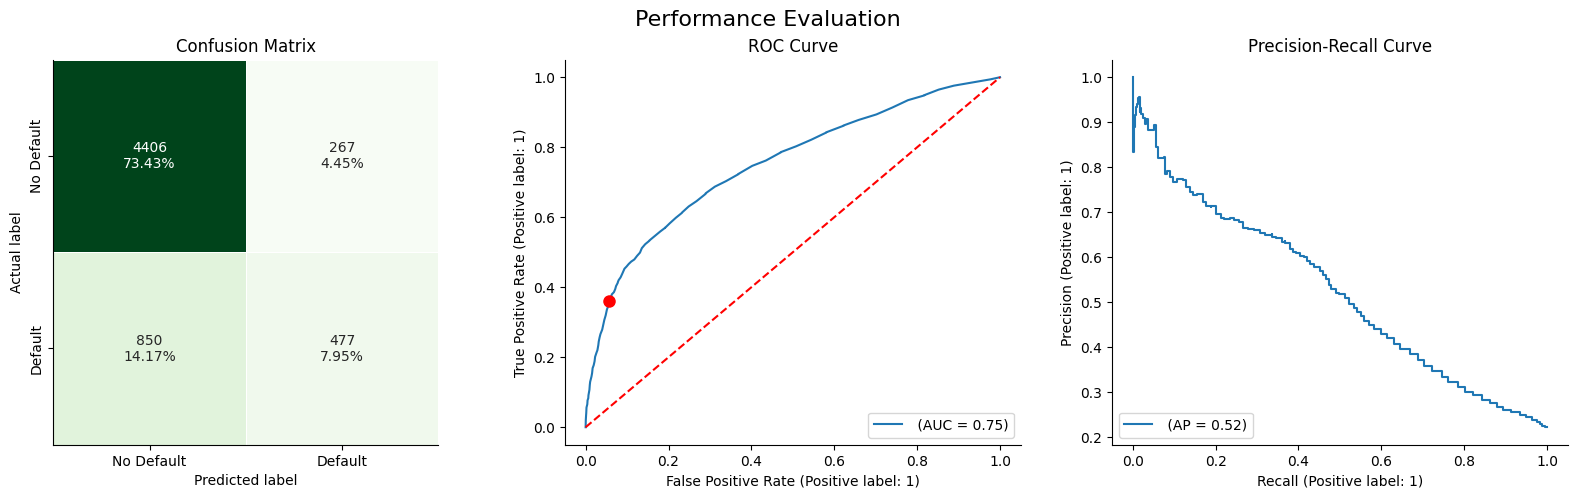

In [13]:
rf = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", rf)]
)

rf_pipeline.fit(X_train, y_train)
rf_perf = performance_evaluation_report(rf_pipeline, X_test, 
                                        y_test, labels=LABELS,
                                        show_plot=True,
                                        show_pr_curve=True)

print(f"Recall : {rf_perf['recall']:.4f}")

sns.despine()

### 3. Define and fit Gradient Boosted Trees pipeline

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Recall : 0.3323


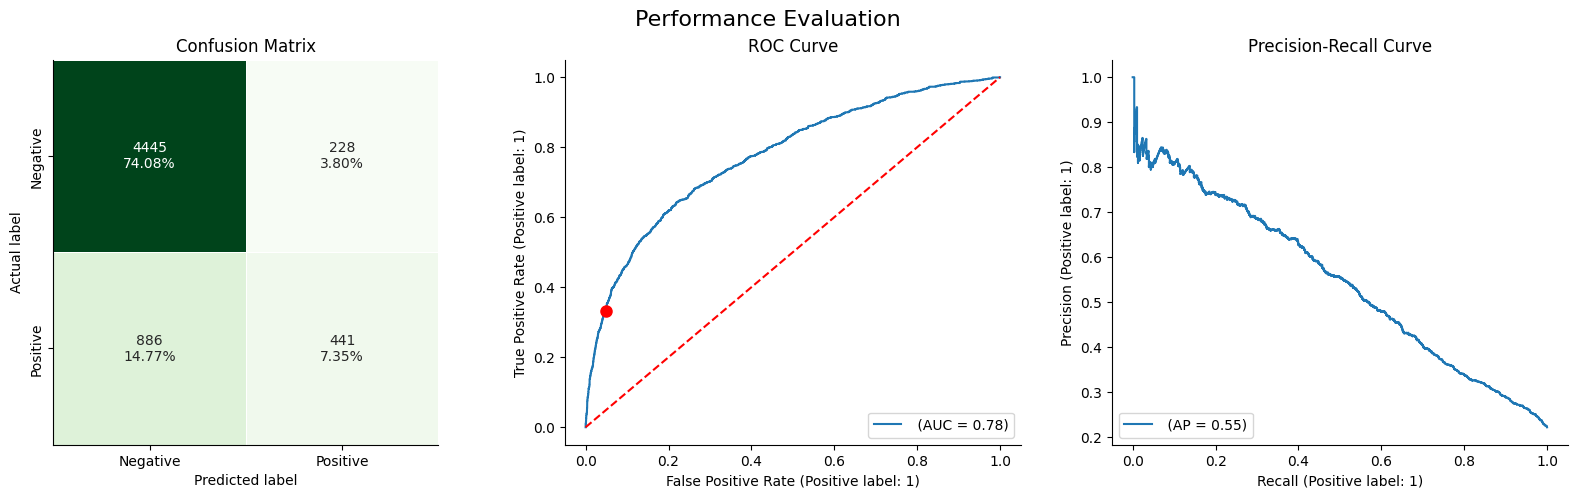

In [16]:
gbt = GradientBoostingClassifier(random_state=42)
gbt_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", gbt)]
)

gbt_pipeline.fit(X_train, y_train)
gbt_perf = performance_evaluation_report(
    gbt_pipeline, X_test, y_test, show_plot=True, show_pr_curve=True
)

print(f"Recall : {gbt_perf['recall']:.4f}")

sns.despine()

### 4. Define and fit an XGBoost pipeline

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Recall : 0.3519


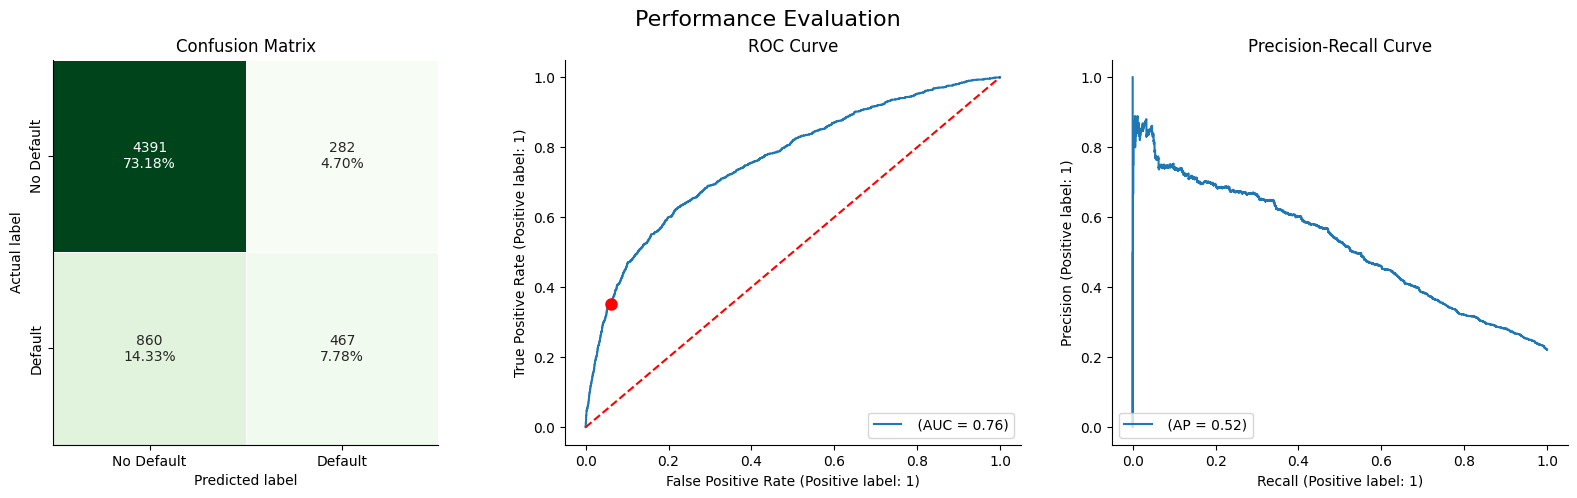

In [17]:
xgb = XGBClassifier(random_state=42)
xgb_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", xgb)]
)

xgb_pipeline.fit(X_train, y_train)
xgb_perf = performance_evaluation_report(xgb_pipeline, X_test, 
                                         y_test, labels=LABELS,
                                         show_plot=True,
                                         show_pr_curve=True)

print(f"Recall : {xgb_perf['recall']:.4f}")

sns.despine()

### 5. Define and fit the LightGBM pipeline

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Recall: 0.3632


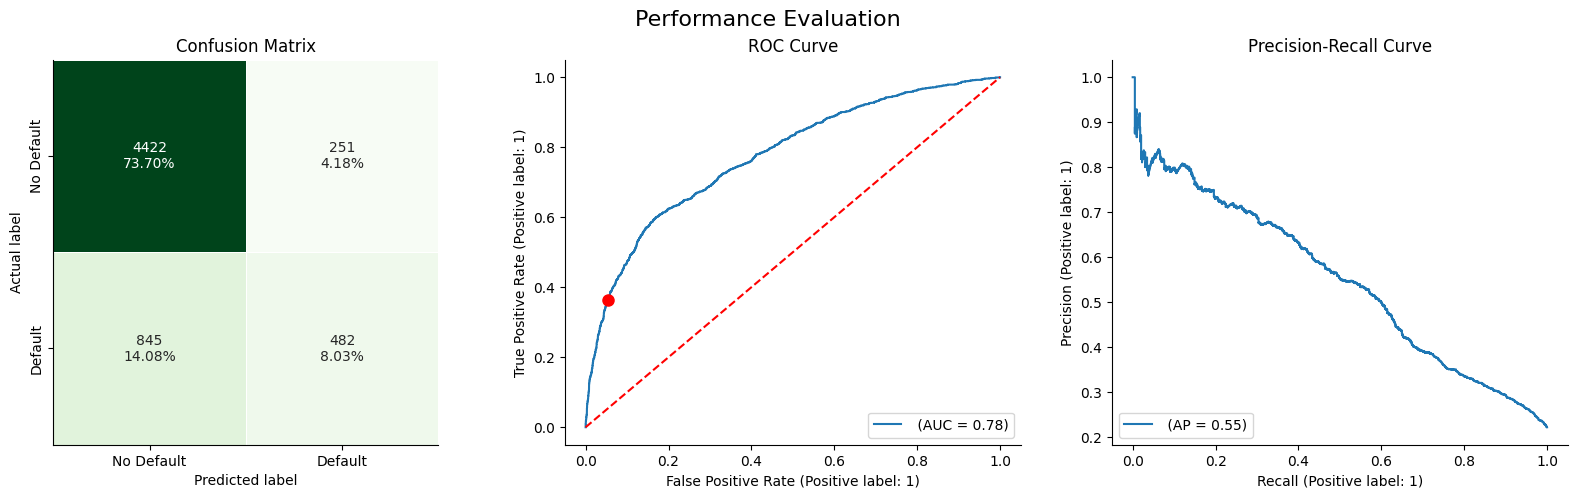

In [18]:
lgbm = LGBMClassifier(random_state=42)
lgbm_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", lgbm)]
)

lgbm_pipeline.fit(X_train, y_train)
lgbm_perf = performance_evaluation_report(lgbm_pipeline, X_test, 
                                          y_test, labels=LABELS,
                                          show_plot=True,
                                          show_pr_curve=True)

print(f"Recall: {lgbm_perf['recall']:.4f}")

sns.despine()

## There's more

In [19]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
import numpy as np

N_SEARCHES = 100
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

### Random Forest

When tuning the Random Forest classifier, we look at the following hyperparameters (there are more available for tuning):

- `n_estimators - the number of decision trees in a forest. The goal is to find a balance between improved accuracy and computational cost.

- `max_features` - the maximum number of features considered for splitting a node. The default is the square root of the number of features. When None, all features are considered.

- `max_depth` - the maximum number of levels in each decision tree

- `min_samples_split`  - the minimum number of observations required to split each node. When set to high it may cause underfitting, as the trees will not split enough times.

- `min_samples_leaf` - the minimum number of data points allowed in a leaf. Too small a value might cause overfitting, while large values might prevent the tree from growing and cause underfitting.

- `bootstrap` - whether to use bootstrapping for each tree in the forest

In [25]:
# we define the grid

rf_param_grid = {
    "classifier__n_estimators": np.linspace(100, 500, 5, dtype=int),
    "classifier__max_features": ["log2", "sqrt", None],
    "classifier__max_depth": np.arange(3, 11, 1, dtype=int),
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": np.arange(1, 51, 2, dtype=int),
    "classifier__bootstrap": [True, False]
}

In [27]:
# ue the radomized search to tune the classifier
rf_rs =  RandomizedSearchCV(rf_pipeline, rf_param_grid, scoring="recall", 
                            cv=k_fold, n_jobs=-1, verbose=1, 
                            n_iter=N_SEARCHES, random_state=42)

rf_rs.fit(X_train, y_train)

print(f"Best parameters: {rf_rs.best_params_}") 
print(f"Recall (Training set): {rf_rs.best_score_:.4f}") 
print(f"Recall (Test set): {metrics.recall_score(y_test, rf_rs.predict(X_test)):.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: Fu

Best parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 7, 'classifier__max_features': None, 'classifier__max_depth': 8, 'classifier__bootstrap': False}
Recall (Training set): 0.3722
Recall (Test set): 0.3738


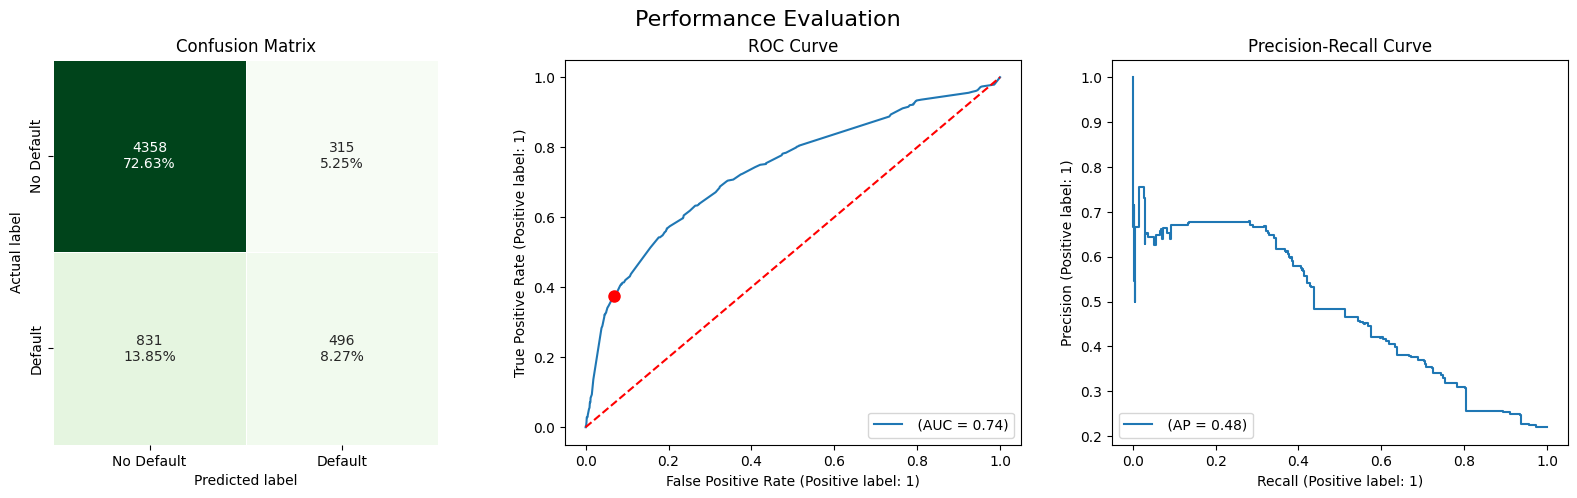

In [52]:
rf_rs_perf = performance_evaluation_report(rf_rs, X_test,
                                           y_test, labels=LABELS,
                                           show_plot=True,
                                           show_pr_curve=True)

### Gradient Boosted Trees

In [32]:
# We define the grid as follows

gbt_param_grid = {
    "classifier__n_estimators": np.linspace(100, 500, 5, dtype=int),
    "classifier__learning_rate": np.arange(0.05, 0.31, 0.05),
    "classifier__max_depth": np.arange(10, 11, 1, dtype=int),
}

In [33]:
# run the radomized search

gbt_rs = RandomizedSearchCV(gbt_pipeline, gbt_param_grid, scoring="recall",
                            cv=k_fold, n_jobs=-1, verbose=1,
                            n_iter=N_SEARCHES, random_state=42)

gbt_rs.fit(X_train, y_train)

print(f"Best parameters: {gbt_rs.best_params_}")
print(f"Recall (Training set): {gbt_rs.best_score_:.4f}")
print(f"Recall (Test set): {metrics.recall_score(y_test, gbt_rs.predict(X_test)):.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: Fu

Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.2}
Recall (Training set): 0.3818
Recall (Test set): 0.3783


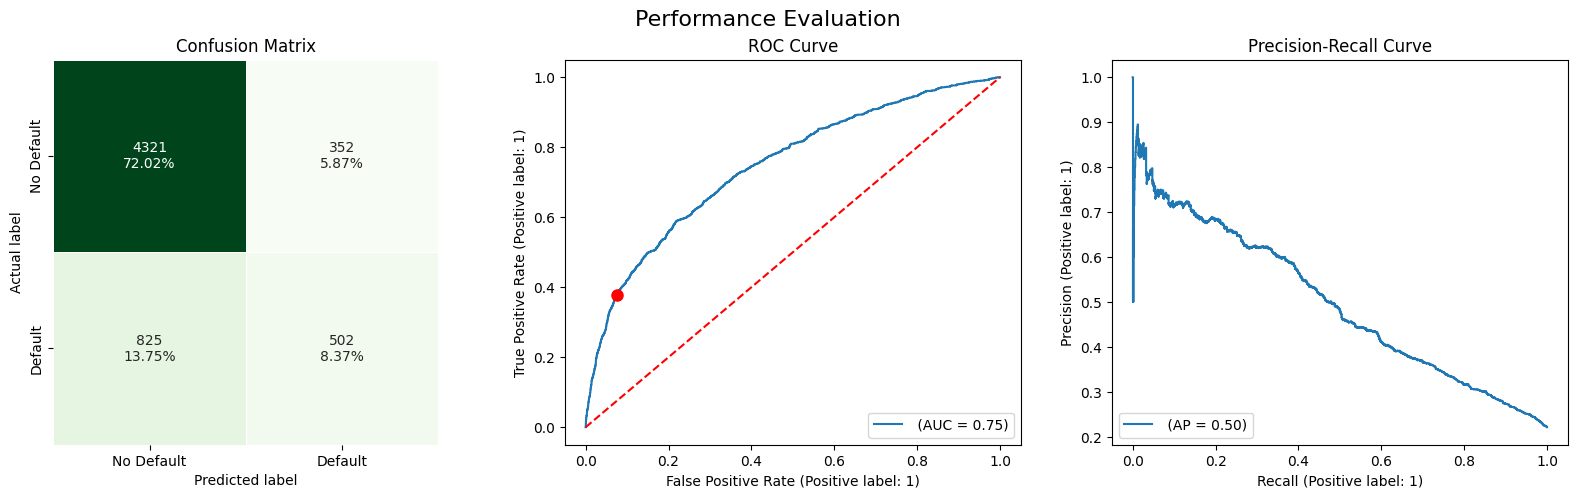

In [34]:
gbt_rs_perf = performance_evaluation_report(gbt_rs, X_test,
                                            y_test, labels=LABELS,
                                            show_plot=True,
                                            show_pr_curve=True)

### XGBoost

The new hyperparameters we consider for this example are:

- `min_child_weight` - indicates the minimum sum of weights of all observations required in a child. This hyperparameter is used for controlling overfitting. Cross-validation should be used for tuning.

- `colsample_bytree` - indicates the fraction of columns to be randomly sampled for each tree.

In [45]:
# we define the grid as:

## For defining ranges of parameters that are restricted (such as colsample_bytree which cannot be higher than 1.0), 
## it is better to use np.linspace rather than np.arange, 
## because the latter allows for some inconsistencies when the step is defined as floating-point. 
## For example, the last value might be 1.0000000002, which then causes an error while training the classifier.


xgb_param_grid = {
    "classifier__n_estimators": np.linspace(300, 500, 3, dtype=int),
    "classifier__learning_rate": np.arange(0.1, 0.31, 0.1),
    "classifier__max_depth": np.arange(10, 11, 1, dtype=int),
    "classifier__min_child_weight": np.arange(7, 8, 1, dtype=int),
    "classifier__colsample_bytree": np.linspace(0.7, 1, 3)
}

In [46]:
xgb_rs = RandomizedSearchCV(xgb_pipeline, xgb_param_grid, scoring="recall",
                            cv=k_fold, n_jobs=-1, verbose=1,
                            n_iter=N_SEARCHES, random_state=42)

xgb_rs.fit(X_train, y_train)

print(f"Best parameters: {xgb_rs.best_params_}")
print(f"Recall (Training set): {xgb_rs.best_score_:.4f}")
print(f"Recall (Test set): {metrics.recall_score(y_test, xgb_rs.predict(X_test)):.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: Fu

Best parameters: {'classifier__n_estimators': 500, 'classifier__min_child_weight': 7, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.30000000000000004, 'classifier__colsample_bytree': 0.85}
Recall (Training set): 0.3850
Recall (Test set): 0.3708


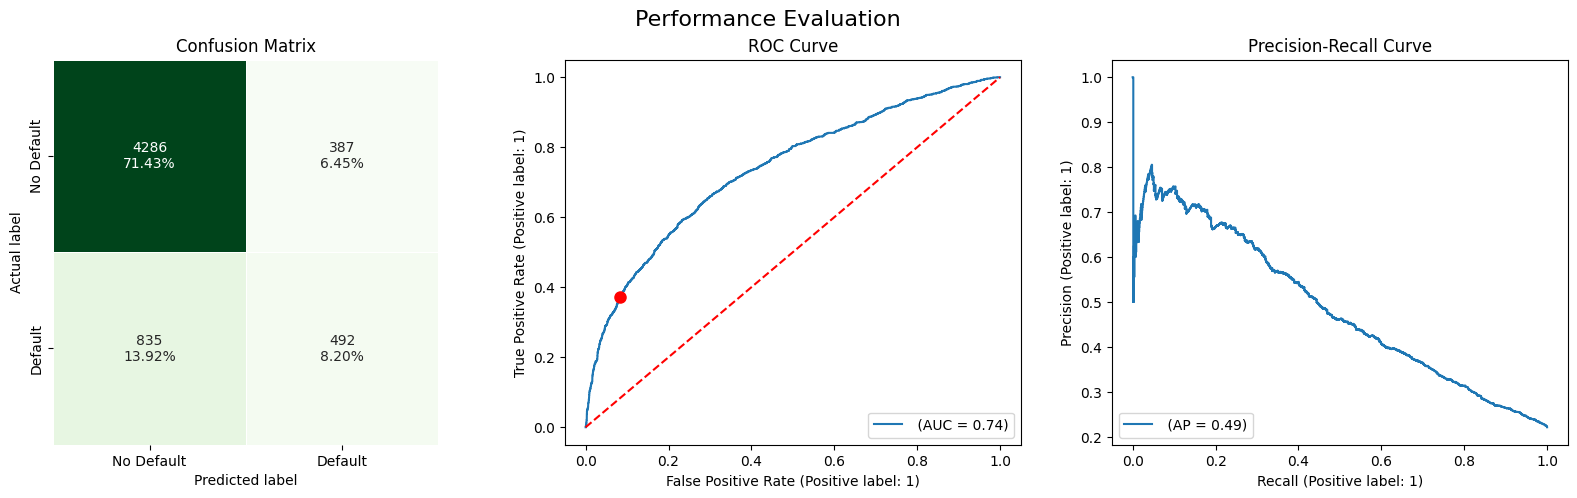

In [47]:
xgb_rs_perf = performance_evaluation_report(xgb_rs, X_test,
                                            y_test, labels=LABELS,
                                            show_plot=True,
                                            show_pr_curve=True)

### LightGBM

In [48]:
# The grid is defines as follows.

lgbm_param_grid = {
    "classifier__n_estimators": np.linspace(300, 500, 3, dtype=int),
    "classifier__learning_rate": np.arange(0.1, 0.31, 0.1),
    "classifier__max_depth": np.arange(10, 11, 1, dtype=int),
    "classifier__colsample_bytree": np.arange(0.7, 1, 3)
}

In [49]:
lgbm_rs = RandomizedSearchCV(lgbm_pipeline, lgbm_param_grid, scoring="recall",
                             cv=k_fold, n_jobs=-1, verbose=1,
                             n_iter=N_SEARCHES, random_state=42)
lgbm_rs.fit(X_train, y_train)

print(f"Best parameters: {lgbm_rs.best_params_}")  
print(f"Recall (Training set): {lgbm_rs.best_score_}:.4f")
print(f"Recall (Test set): {metrics.recall_score(y_test, lgbm_rs.predict(X_test)):.4f}")

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: Fu

Best parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.30000000000000004, 'classifier__colsample_bytree': 0.7}
Recall (Training set): 0.3712579718170862:.4f
Recall (Test set): 0.3693


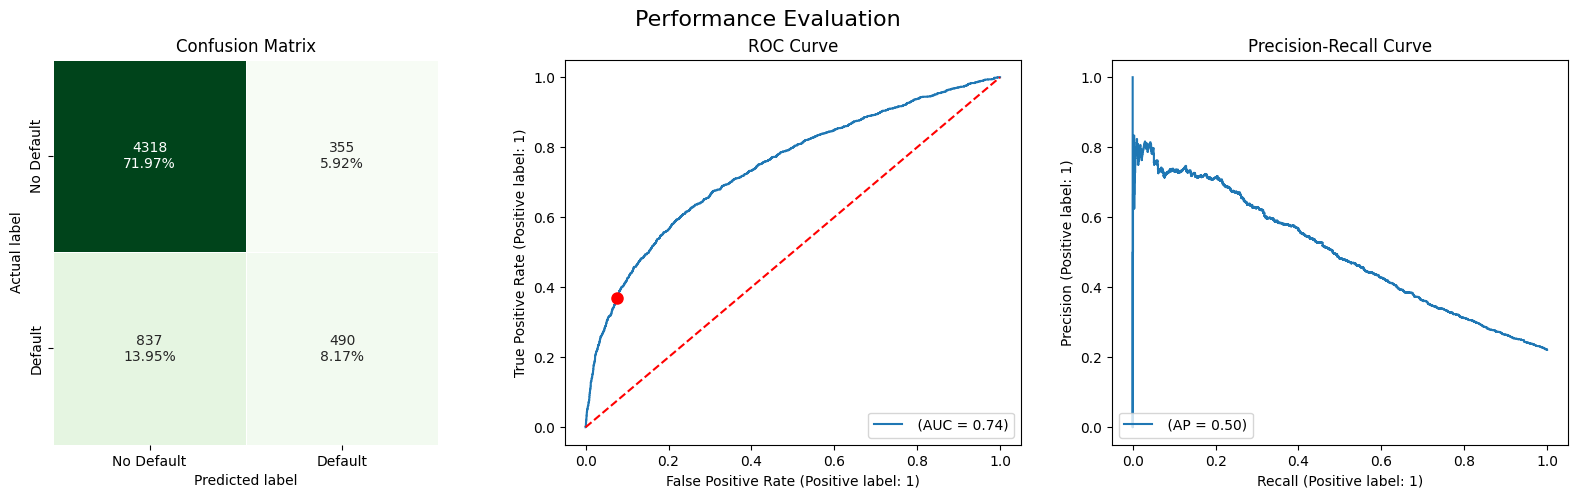

In [50]:
lgbm_rs_perf = performance_evaluation_report(lgbm_rs, X_test,
                                             y_test, labels=LABELS,
                                             show_plot=True,
                                             show_pr_curve=True)

In [53]:
# Below we present a summary of all the classifiers.

results_dict = {
    "decision_tree_baseline": tree_pref,
    "random_forest": rf_perf,
    "random_forest_rs": rf_rs_perf,
    "gradient_boosted_trees": gbt_perf,
    "gradient_boosted_trees_rs": gbt_rs_perf,
    "xgboost": xgb_perf,
    "xgboost_rs": xgb_rs_perf,
    "light_gbm": lgbm_perf,
    "light_gbm_rs": lgbm_rs_perf,
}

results_comparison = pd.DataFrame(results_dict).T
results_comparison

,accuracy,precision,recall,specificity,f1_score,cohens_kappa,matthews_corr_coeff,roc_auc,pr_auc,average_precision
decision_tree_baseline,0.726000,0.385062,0.400151,0.818532,0.392461,0.215657,0.215724,0.609624,0.458870,0.286807
random_forest,0.813833,0.641129,0.359457,0.942863,0.460647,0.358748,0.380704,0.750656,0.526353,0.522416
random_forest_rs,0.809000,0.611591,0.373775,0.932591,0.463985,0.355915,0.371897,0.735163,0.486253,0.482167
gradient_boosted_trees,0.814333,0.659193,0.332329,0.951209,0.441884,0.344736,0.373875,0.775486,0.547474,0.547813
gradient_boosted_trees_rs,0.803833,0.587822,0.378297,0.924674,0.460339,0.347289,0.359890,0.746449,0.496382,0.496914
xgboost,0.809667,0.623498,0.351922,0.939653,0.449904,0.345443,0.366118,0.761328,0.520238,0.520996
xgboost_rs,0.796333,0.559727,0.370761,0.917184,0.446056,0.327533,0.337964,0.736666,0.485275,0.485812
light_gbm,0.817333,0.657572,0.363225,0.946287,0.467961,0.368580,0.392264,0.775395,0.547444,0.547763
light_gbm_rs,0.801333,0.579882,0.369254,0.924032,0.451197,0.337125,0.349930,0.741783,0.498261,0.498989


In [ ]:
results_comparison.to_csv('./datasets/results_comparison.csv')

# Exploring alternative approaches to encoding categorical features

## Getting ready

In [54]:
# prepare the Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from evaluation_report import performance_evaluation_report
from sklearn.ensemble import RandomForestClassifier

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


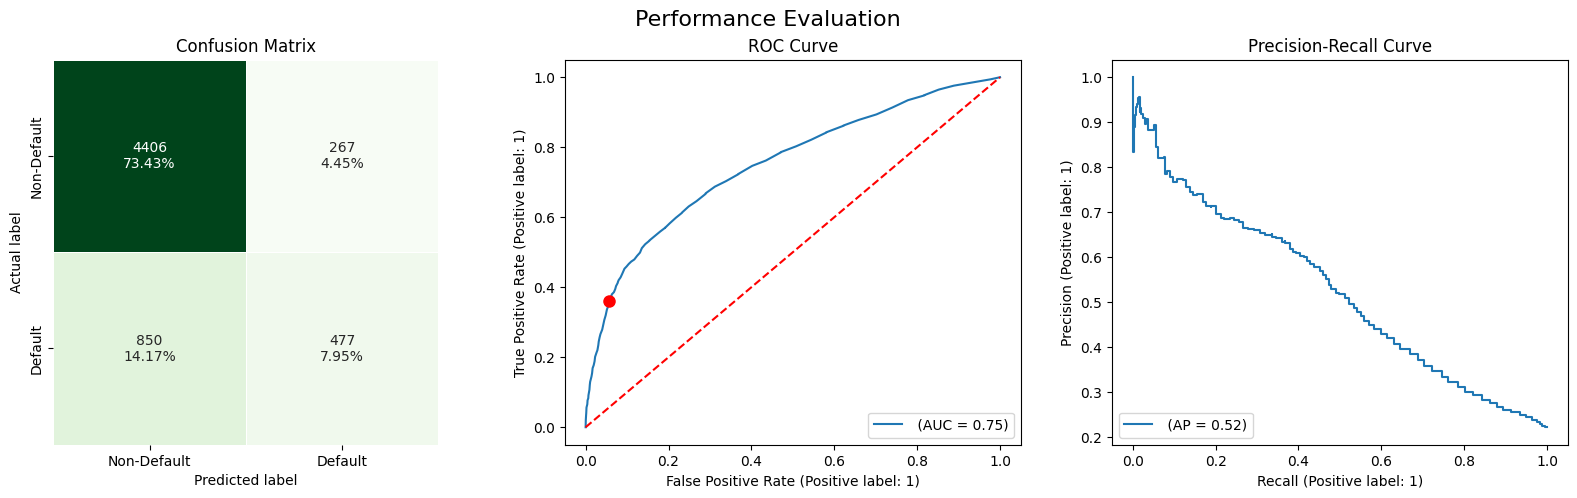

In [56]:
df = pd.read_csv('./datasets/credit_card_default.csv', na_values="")

X = df.copy()
y = X.pop("default_payment_next_month")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

num_features = X_train.select_dtypes(include="number").columns.tolist()
cat_features = X_train.select_dtypes(include="object").columns.tolist()

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoding", OneHotEncoder(categories=cat_list, sparse=False,
                                   handle_unknown="error", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", num_pipeline, num_features),
        ("categorical", cat_pipeline, cat_features)
    ],
    remainder="drop"
)

rf_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier(random_state=42))]
)

rf_pipeline.fit(X_train, y_train)

LABELS = ["Non-Default", "Default"]
rf_perf = performance_evaluation_report(rf_pipeline, X_test,
                                        y_test, labels=LABELS,
                                        show_plot=True,
                                        show_pr_curve=True)

In [57]:
rf_perf

{'accuracy': 0.8138333333333333,
 'precision': 0.6411290322580645,
 'recall': 0.359457422758101,
 'specificity': 0.9428632570083458,
 'f1_score': 0.460647030420087,
 'cohens_kappa': 0.3587476692171325,
 'matthews_corr_coeff': 0.38070366812596135,
 'roc_auc': 0.7506556528702865,
 'pr_auc': 0.5263529271677134,
 'average_precision': 0.5224157147423913}

In [58]:
print(f"Recall: {rf_perf['recall']:.4f}")

Recall: 0.3595


## How to do it

### 1. Import the libraries

In [59]:
import category_encoders as ce
from sklearn.base import clone

### 2. Fit the pipeline using target encoding

Recall: 0.3580


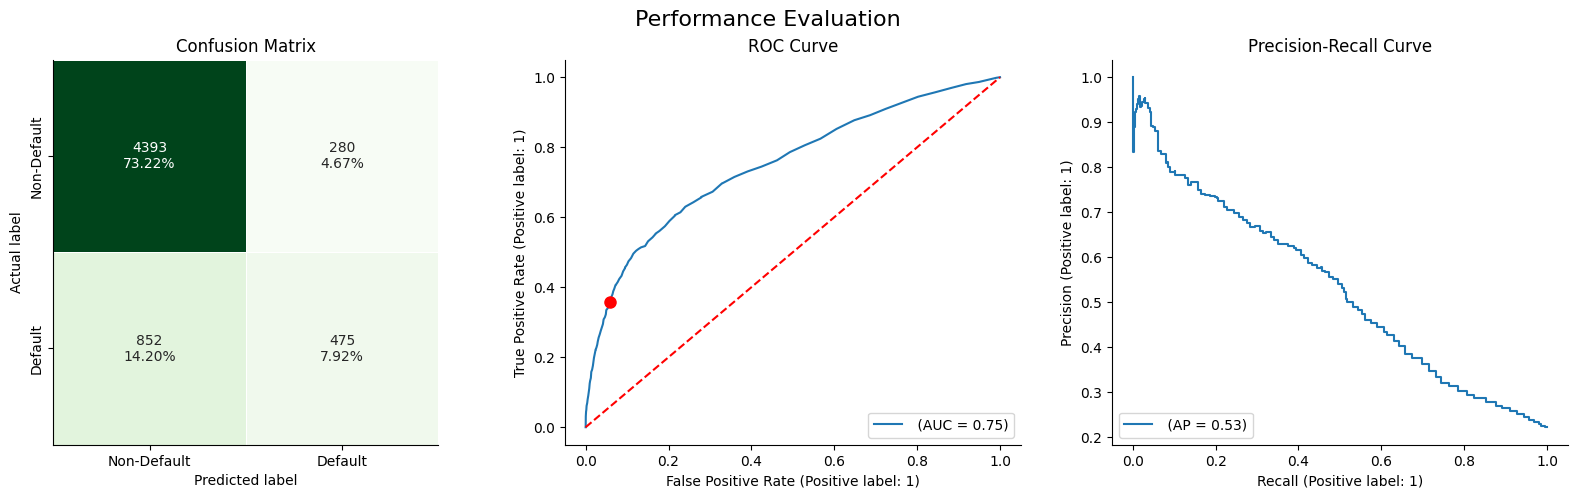

In [60]:
pipeline_target_enc = clone(rf_pipeline)
pipeline_target_enc.set_params(
    preprocessor__categorical__cat_encoding=ce.TargetEncoder()
)

pipeline_target_enc.fit(X_train, y_train)
target_enc_perf = performance_evaluation_report(
    pipeline_target_enc, X_test, 
    y_test, labels=LABELS,
    show_plot=True,
    show_pr_curve=True
)
print(f"Recall: {target_enc_perf['recall']:.4f}")

sns.despine()

### 3. Fit the pipeline using Leave One Out encoding

Recall: 0.1462


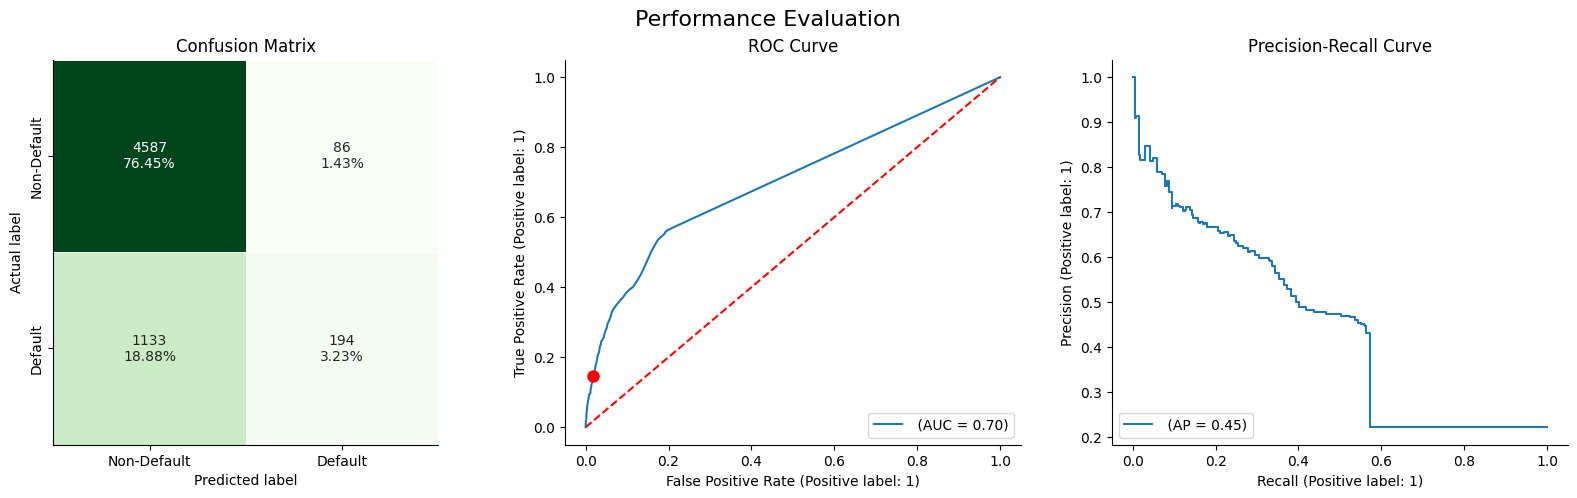

In [62]:
pipeline_loo_enc = clone(rf_pipeline)
pipeline_loo_enc.set_params(
    preprocessor__categorical__cat_encoding = ce.LeaveOneOutEncoder()
)

pipeline_loo_enc.fit(X_train, y_train)
loo_enc_perf = performance_evaluation_report(
    pipeline_loo_enc, X_test,
    y_test, labels=LABELS,
    show_plot=True,
    show_pr_curve=True
)
print(f"Recall: {loo_enc_perf['recall']:.4f}")

sns.despine()

Recall: 0.3444


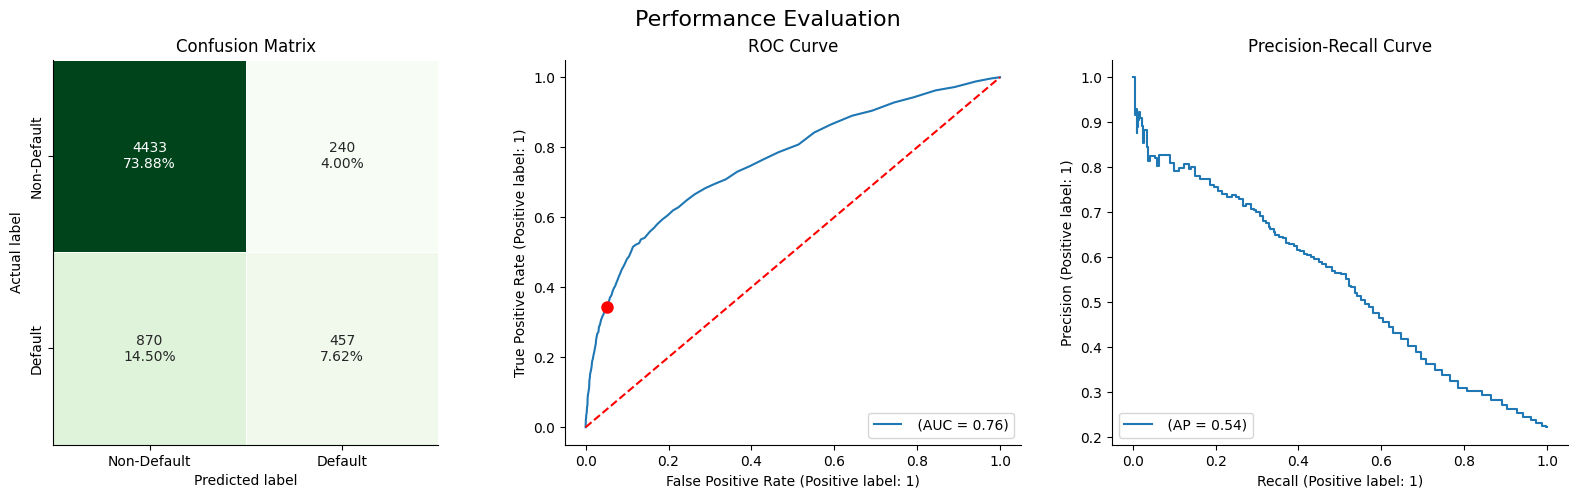

In [63]:
# testinf if we can improve the performance by adding random noise

pipeline_loo_enc = clone(rf_pipeline)
pipeline_loo_enc.set_params(
    preprocessor__categorical__cat_encoding=ce.LeaveOneOutEncoder(sigma=0.05, random_state=42)
)
pipeline_loo_enc.fit(X_train, y_train)
loo_enc_perf = performance_evaluation_report(
    pipeline_loo_enc, X_test,
    y_test, labels=LABELS,
    show_plot=True,
    show_pr_curve=True
)
print(f"Recall: {loo_enc_perf['recall']:.4f}")

sns.despine()


### 4. Fit the pipeline using Weight of Evidence encoding

Recall: 0.3670


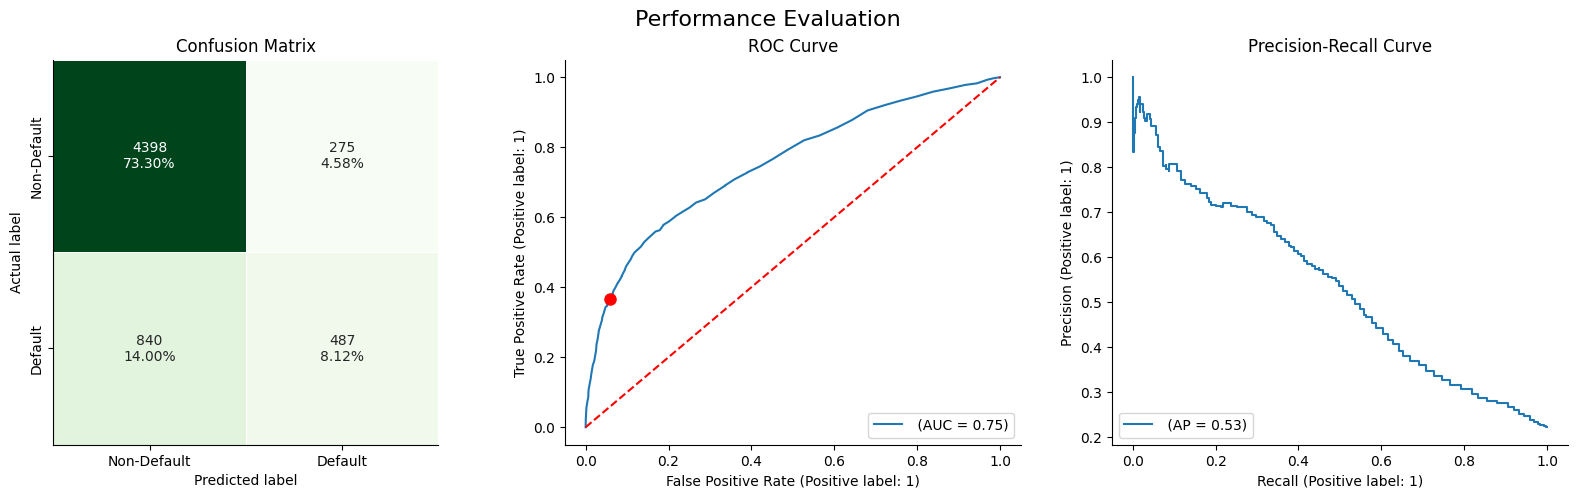

In [65]:
pipeline_woe_enc = clone(rf_pipeline)
pipeline_woe_enc.set_params(
    preprocessor__categorical__cat_encoding=ce.WOEEncoder()
)
pipeline_woe_enc.fit(X_train, y_train)
woe_enc_perf = performance_evaluation_report(
    pipeline_woe_enc, X_test, 
    y_test, labels=LABELS,
    show_plot=True,
    show_pr_curve=True
)

print(f"Recall: {woe_enc_perf['recall']:.4f}")

sns.despine()

## There's more

In [73]:
# # Experimenting with different values of `min_samples_leaf` and `smoothing` for target encoding

# for smoothing in [0, 1, 2, 5, 10]:
#     for min_smpl_leaf in [1, 5]:

#         pipeline_target_enc = clone(rf_pipeline)
#         pipeline_target_enc.set_params(
#             preprocessor__categorical__cat_encoding=ce.TargetEncoder(
#                 min_samples_leaf=min_smpl_leaf, smoothing=smoothing
#             )
#         )

#         pipeline_target_enc.fit(X_train, y_train)
#         target_enc_perf = performance_evaluation_report(
#             pipeline_target_enc, X_test,
#             y_test, labels=LABELS,
#             show_plot=False,
#             show_pr_curve=False
#         )
#         print(f"Smoothing <{smoothing}> Min Samples Leaf <{min_smpl_leaf}> --- Recall : {target_enc_perf['recall']:.4f}")
        

In [74]:
import category_encoders as ce
import pandas as pd

### Target encoding

In [76]:
# binary target
df = pd.DataFrame({
   "category":["a", "a", "b", "b", "b"], 
   "target":[1,0,1,1,0]})

X = df.drop("target", axis = 1)
y = df.drop("category", axis = 1)

encoder = ce.TargetEncoder(smoothing=0)
encoder.fit_transform(X, y["target"])

,category
0,0.6
1,0.6
2,0.6
3,0.6
4,0.6


In [77]:
# continuous target
df = pd.DataFrame({
    "category": ["a", "a", "b", "b", "b"],
    "target": [5, 3, 1, 3, 6]
})

X = df.drop("target", axis=1)
y = df.drop("category", axis=1)

encoder = ce.TargetEncoder(smoothing=0)
encoder.fit_transform(X, y["target"])

,category
0,3.6
1,3.6
2,3.6
3,3.6
4,3.6


### Leave One Out encoding

In [78]:
df = pd.DataFrame({
    "category": ["a", "a", "b", "b", "b"],
    "target": [1, 0, 1, 1, 0]
})

X = df.drop("target", axis=1)
y = df.drop("category", axis=1)

encoder = ce.LeaveOneOutEncoder()
encoder.fit_transform(X, y["target"])

,category
0,0.0
1,1.0
2,0.5
3,0.5
4,1.0


### Weight of Evidence encoding

In [79]:
df = pd.DataFrame({
    "category": ["a", "a", "b", "b", "b"],
    "target": [1, 0, 1, 1, 0]
})

X = df.drop("target", axis=1)
y = df.drop("category", axis=1)

encoder = ce.WOEEncoder(regularization=0)
encoder.fit_transform(X, y["target"])

,category
0,-0.405465
1,-0.405465
2,0.287682
3,0.287682
4,0.287682


### Binary encoding

In [80]:
df = pd.DataFrame({
    "category": [str(x) for x in np.random.normal(size=100)]
})

encoder = ce.BinaryEncoder()
encoder.fit_transform(df).shape

(100, 7)

# Investigating different approaches to handling imbalanced data